## Introduction to RDF2Vec
RDF2Vec is a technique for creating vector representations of entities in a Knowledge Graph (KG), leveraging the structure of the graph and the relationships between entities to encode semantic information into a dense vector form. This allows traditional machine learning algorithms to process complex graph structures.

### Mathematical and ML Background
- Graph Theory Basics: A graph G is defined as a set of nodes (vertices) V and edges E connecting them. In RDF graphs, nodes represent entities, and edges represent relationships between these entities.

- Embeddings: In machine learning, embeddings are dense vector representations of entities that capture the essence of the entity's properties. Word2Vec, a popular embedding technique, uses neural networks to learn word associations from text by predicting a word from its context.

- RDF2Vec Transformation: Conceptually similar to Word2Vec, RDF2Vec generates walks across the KG and treats these walks as sentences, applying the Word2Vec algorithm to learn embeddings for each entity.

#### Step 1: Environment Setup

In [2]:
# !pip install rdflib gensim sklearn matplotlib networkx
import rdflib
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import networkx as nx


## Step 2: Generating Mock Retail RDF Data
Imagine a simple retail scenario with products and categories. We'll simulate this in RDF:

In [3]:
from rdflib import URIRef, Literal, Namespace, Graph
from rdflib.namespace import RDF, RDFS

n = Namespace("http://example.org/")
g = Graph()

# Products
g.add((n.product1, RDF.type, n.Product))
g.add((n.product1, RDFS.label, Literal("Laptop")))
g.add((n.product2, RDF.type, n.Product))
g.add((n.product2, RDFS.label, Literal("Smartphone")))

# Categories
g.add((n.electronics, RDF.type, n.Category))
g.add((n.electronics, RDFS.label, Literal("Electronics")))
g.add((n.product1, n.isInCategory, n.electronics))
g.add((n.product2, n.isInCategory, n.electronics))


<Graph identifier=N6c7e8a1b95f84bb3b2661761380fe9b2 (<class 'rdflib.graph.Graph'>)>

## Step 3: Visualizing the RDF Graph
Visualization helps in understanding the structure of the KG:

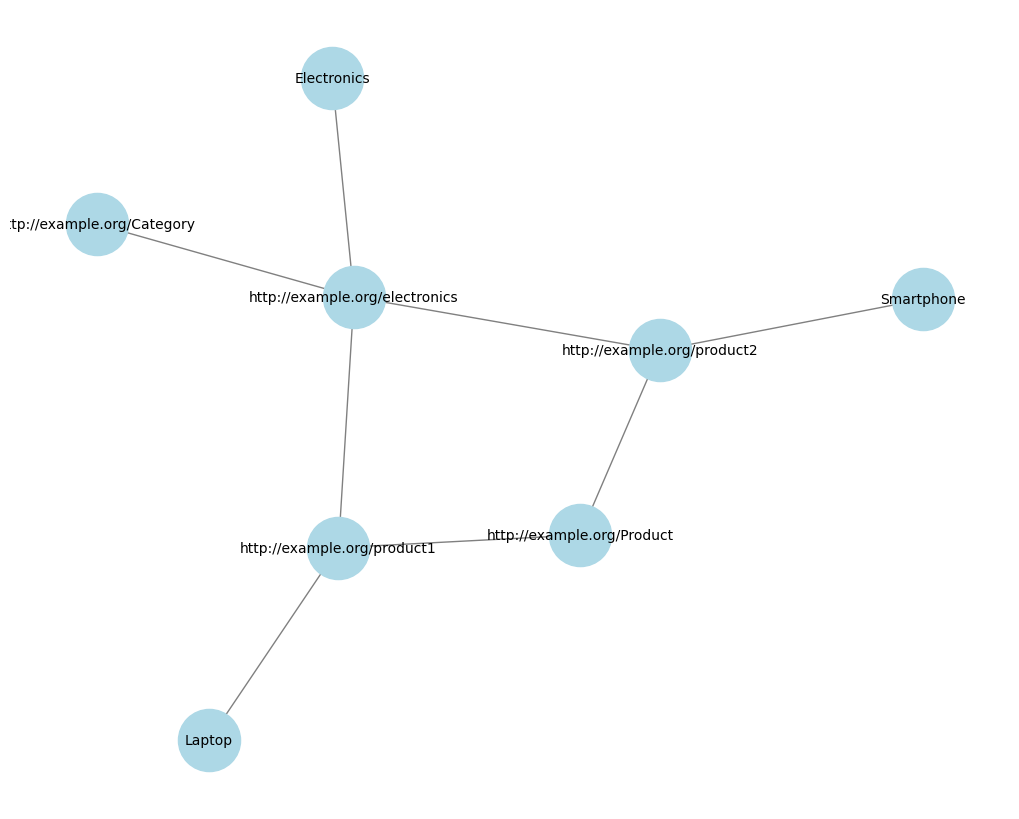

In [4]:
def visualize_graph(graph):
    plt.figure(figsize=(10, 8))
    G = nx.Graph()
    for subj, pred, obj in graph:
        G.add_edge(str(subj), str(obj), label=str(pred))
    pos = nx.spring_layout(G, k=0.5)  # k regulates the distance between nodes
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color="lightblue", font_size=10, edge_color="gray")
    plt.show()

visualize_graph(g)


## Step 4: Generating Walks
Random walks simulate the process of traversing the graph, starting from each entity:

In [6]:
import numpy as np


def generate_random_walks(graph, depth=5, num_walks=100):
    walks = []
    for s in graph.subjects():
        for _ in range(num_walks):
            walk = [s]
            for _ in range(depth):
                if len(list(graph.objects(walk[-1], None))) > 0:
                    walk.append(rdflib.URIRef(np.random.choice(list(graph.objects(walk[-1], None)))))
            walks.append([str(x) for x in walk])
    return walks

walks = generate_random_walks(g)


## Step 5: Training RDF2Vec Model
Utilize the generated walks to create embeddings:

In [7]:
model = Word2Vec(walks, vector_size=100, window=5, min_count=1, sg=1, workers=4)


## Step 6: Applying and Analyzing Embeddings
Use t-SNE for dimensionality reduction to visualize the embeddings:

In [18]:
%matplotlib inline


Not enough samples for default perplexity, adjusting...


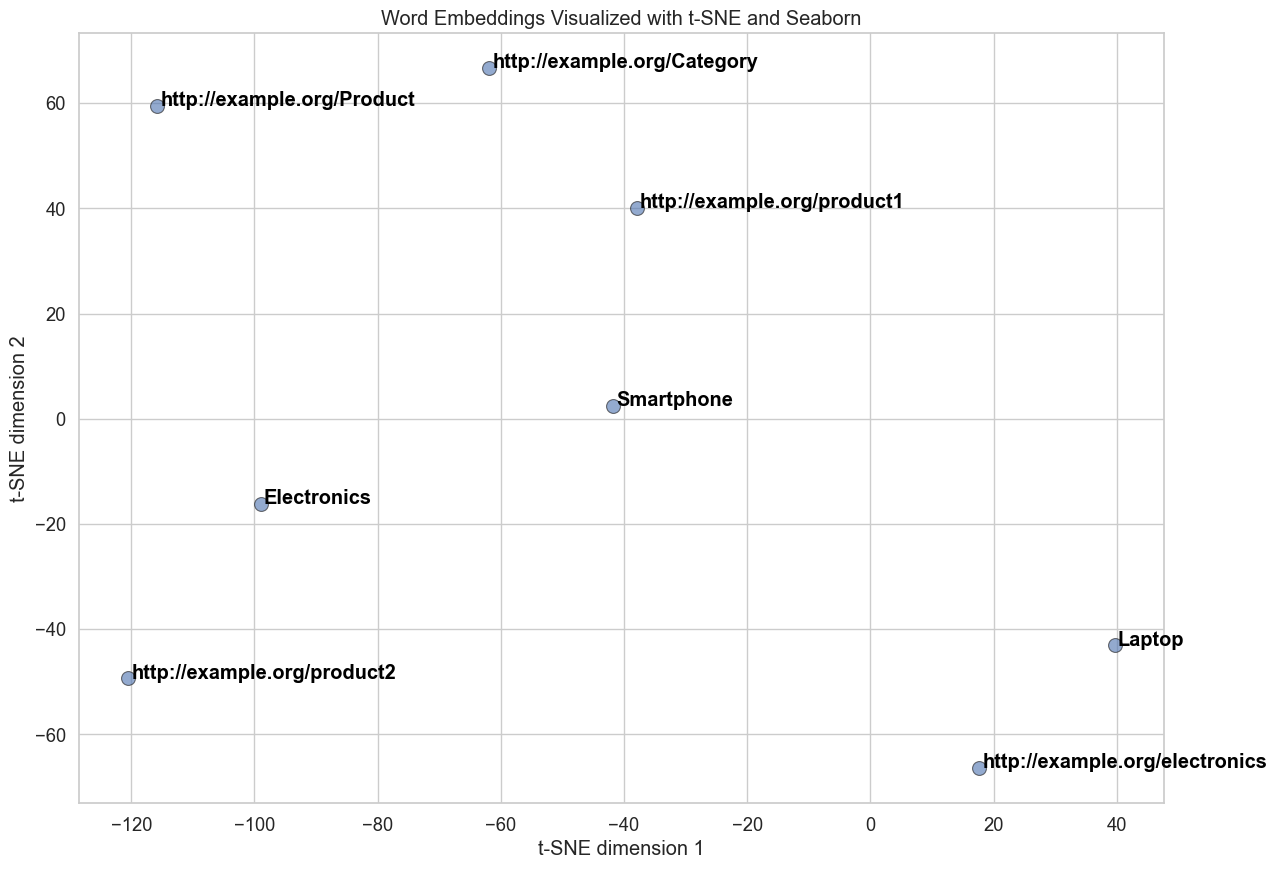

In [19]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# Assuming 'model' is already trained Word2Vec model
# Prepare data for TSNE
X = np.array(model.wv.vectors)

if len(X) < 30:
    print("Not enough samples for default perplexity, adjusting...")
    perplexity_value = len(X) / 3  # Adjust perplexity based on your dataset size
else:
    perplexity_value = 30  # Default value

# Apply TSNE with adjusted perplexity
X_tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=42).fit_transform(X)

# Create a DataFrame for Seaborn plotting
df_tsne = pd.DataFrame(X_tsne, columns=['dim1', 'dim2'])
df_tsne['word'] = model.wv.index_to_key  # Add word labels

# Set the Seaborn theme for better aesthetics
sns.set(style="whitegrid", context="notebook", font_scale=1.2, rc={"figure.figsize": (14, 10)})

# Visualization with Seaborn
plt.figure(figsize=(14, 10))
plot = sns.scatterplot(data=df_tsne, x='dim1', y='dim2', s=100, alpha=0.6, edgecolor='k')

# Adding annotations for each point with a slight offset to reduce overlap
for i, word in enumerate(df_tsne['word']):
    plot.text(df_tsne.iloc[i, 0]+0.5, df_tsne.iloc[i, 1], word, horizontalalignment='left', size='medium', color='black', weight='semibold')

plt.title('Word Embeddings Visualized with t-SNE and Seaborn')
plt.xlabel('t-SNE dimension 1')
plt.ylabel('t-SNE dimension 2')
plt.show()


## Conclusion
This tutorial outlined the steps to use RDF2Vec in a retail scenario, from setting up your environment to visualizing entity embeddings. RDF2Vec's ability to transform KG entities into vector space opens up numerous possibilities for downstream machine learning tasks.

For a more detailed exploration, including optimizing hyperparameters and experimenting with different walking strategies, refer to the pyRDF2Vec GitHub repository and consider diving deeper into the mathematical foundations of graph embeddings and neural language models.